In [6]:
import cv2
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools as mit
import os
from im_processing_fct.functions import *

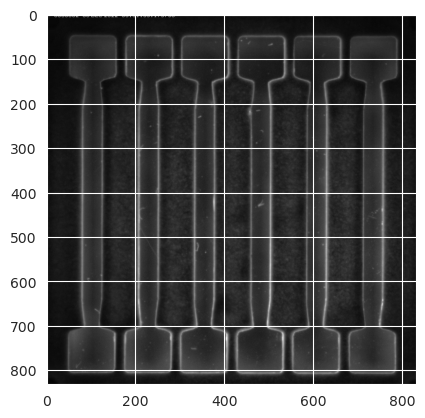

In [5]:
# Load images
ImagePath = pathlib.Path('/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/img_0.jpg')
SampleTest = cv2.imread(ImagePath.as_posix())

plt.imshow(SampleTest)

In [12]:
cols = SampleTest.sum(axis=0)

SyntaxError: invalid syntax (415877440.py, line 2)

In [18]:
ImGr = cv2.cvtColor(SampleTest, cv2.COLOR_BGR2GRAY)  # convert to grayscale
# (height, width) = frame.shape[:2]
cols = ImGr.sum(axis=0)  # Compute sum of gray values of each image column
arenazones = np.where(cols > 55000)  # locate arenas from highest intensity columns
arenazones = arenazones[0].tolist()  # Reformat arenazones to list.

In [19]:
ArenaList = []  #Split the list in 6 arenas according to consecutive values
for zones in mit.consecutive_groups(arenazones):
    ArenaList.append(list(zones))

In [24]:
Edges = [min(ArenaList[n]) if ((n % 2) == 0) else max(ArenaList[n]) for n in range(len(ArenaList))]

In [40]:
Filled=[]

In [41]:

for i in range(0,len(Edges),2):
    Filled.append(list(range(Edges[i], Edges[i+1],1)))

In [35]:
Filled[0]

range(79, 126)

In [42]:

Cropped_Arenas = []

for n in range(len(Filled)):
    Cropped_Arenas.append(ExtList(Filled[n], 40))  #add margins to fully capture arenas


<BarContainer object of 832 artists>

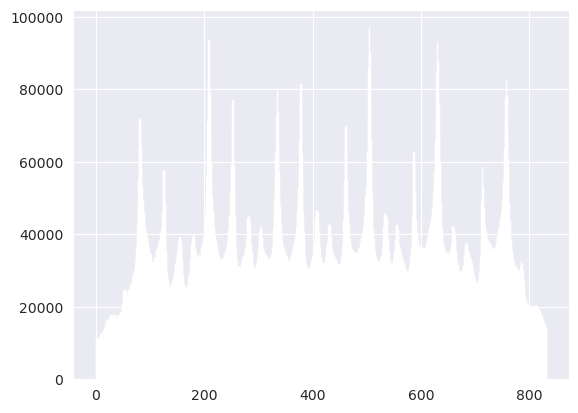

In [16]:
plt.bar(x=range(0,len(cols)), height=cols, color='blue')


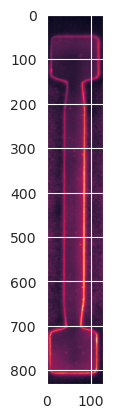

In [51]:
plt.imshow(ImGr[:,Cropped_Arenas[4]])

In [ ]:
Cropped_Arenas.remove(Cropped_Arenas[3])

In [ ]:

len(Cropped_Arenas[0])

In [59]:
ImagePath.with_suffix("")

PosixPath('/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/img_0')

In [60]:
os.mkdir(ImagePath.with_suffix(""))

In [62]:
ImagePath.with_suffix("").as_posix()+'Arena'+str(1)+".jpg"

'/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/img_0Arena1.jpg'

In [64]:
for i in range(len(Cropped_Arenas)) :
    cv2.imwrite(ImagePath.with_suffix("").as_posix()+'/Arena'+str(i+1)+".jpg", ImGr[:,Cropped_Arenas[i]])

In [67]:
ParentPath = pathlib.Path('/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample')

#ParentPath.glob("*.jpg")

In [70]:
for image in ParentPath.glob("*.jpg"):
    loaded = cv2.imread(image.as_posix())
    ImGr = cv2.cvtColor(loaded, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    # (height, width) = frame.shape[:2]
    cols = ImGr.sum(axis=0)  # Compute sum of gray values of each image column
    arenazones = np.where(cols > 55000)  # locate arenas from highest intensity columns
    arenazones = arenazones[0].tolist()  # Reformat arenazones to list.
    ArenaList = []  #Split the list in 6 arenas according to consecutive values
    for zones in mit.consecutive_groups(arenazones):
        ArenaList.append(list(zones))
    Edges = [min(ArenaList[n]) if ((n % 2) == 0) else max(ArenaList[n]) for n in range(len(ArenaList))]
    Filled = []

    for i in range(0, len(Edges), 2):
        Filled.append(list(range(Edges[i], Edges[i + 1], 1)))
    Cropped_Arenas = []

    for n in range(len(Filled)):
        Cropped_Arenas.append(ExtList(Filled[n], 40))  #add margins to fully capture arenas
    os.mkdir(image.with_suffix(""))
    for i in range(len(Cropped_Arenas)) :
        cv2.imwrite(image.with_suffix("").as_posix()+'/Arena'+str(i+1)+".jpg", ImGr[:,Cropped_Arenas[i]])

In [84]:
im_outer_arena_gray[1].shape[1]

129

In [87]:
Ndshapes = [im_outer_arena_gray[i].shape[1] for i in range(len(im_outer_arena_gray))]

In [88]:
np.average(Ndshapes)

127.27083333333333

In [71]:
im_outer_arena_gray = []
im_outer_arena_path = ParentPath

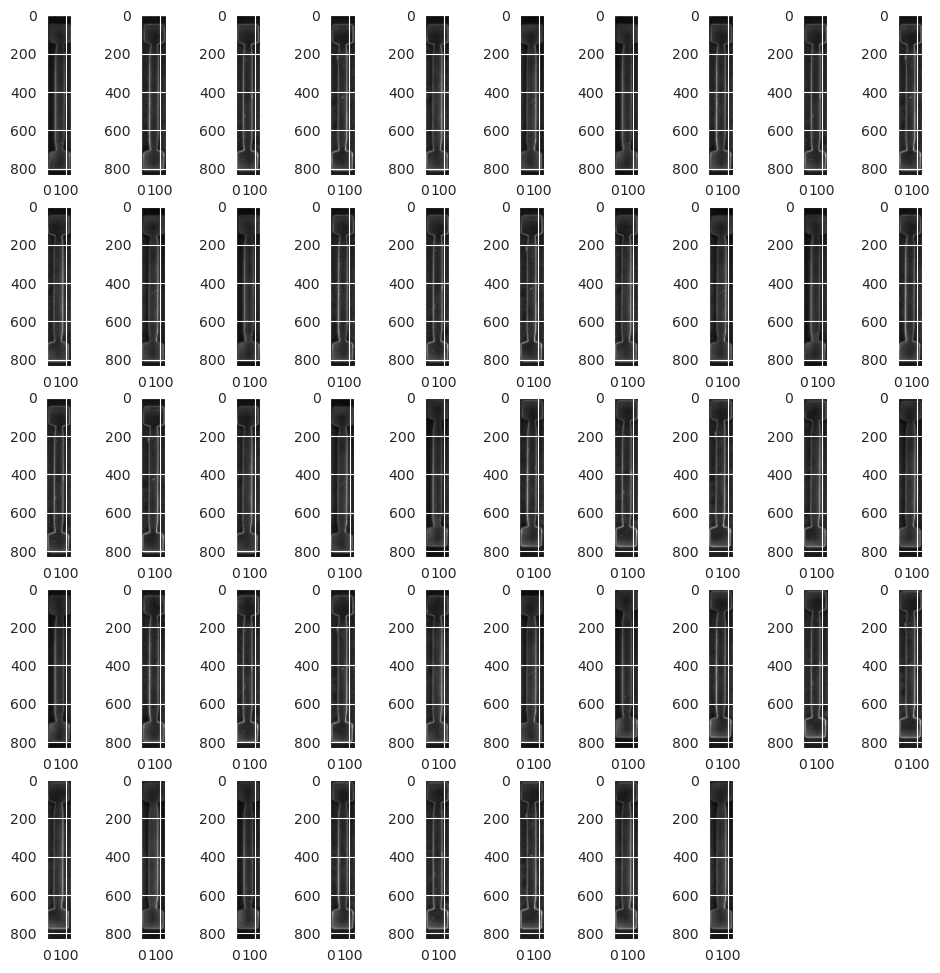

In [72]:

im_outer_arena_nb = 0
for img in im_outer_arena_path.rglob('*.jpg'):
    im = cv2.imread(img.as_posix())
    im_outer_arena_gray.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
    im_outer_arena_nb += 1

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb / 5 + 1)), i + 1),
    plt.imshow(im_outer_arena_gray[i], cmap='gray', vmin=0, vmax=255)

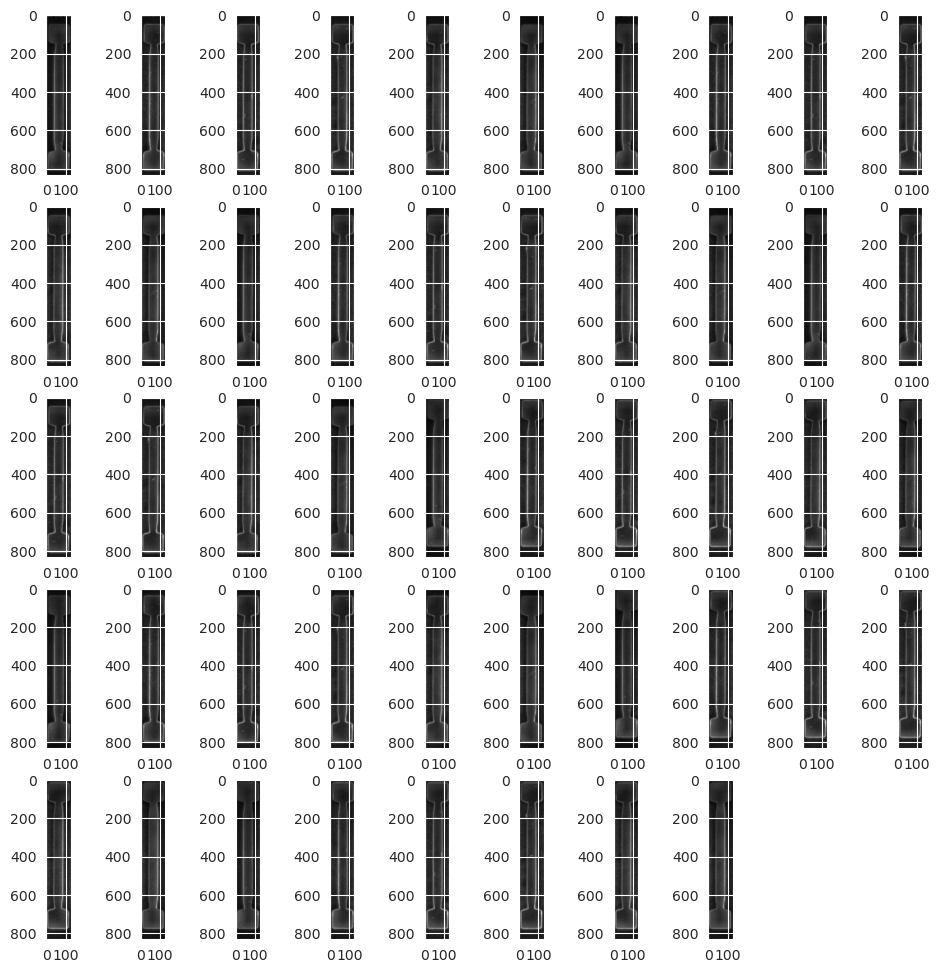

In [98]:
im_outer_arena_gray_resized = []

for img in range(len(im_outer_arena_gray)):
    im_outer_arena_gray_resized.append(cv2.resize(im_outer_arena_gray[img], (round(np.average(Ndshapes)), 832)))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb / 5 + 1)), i + 1),
    plt.imshow(im_outer_arena_gray_resized[i], cmap='gray', vmin=0, vmax=255)

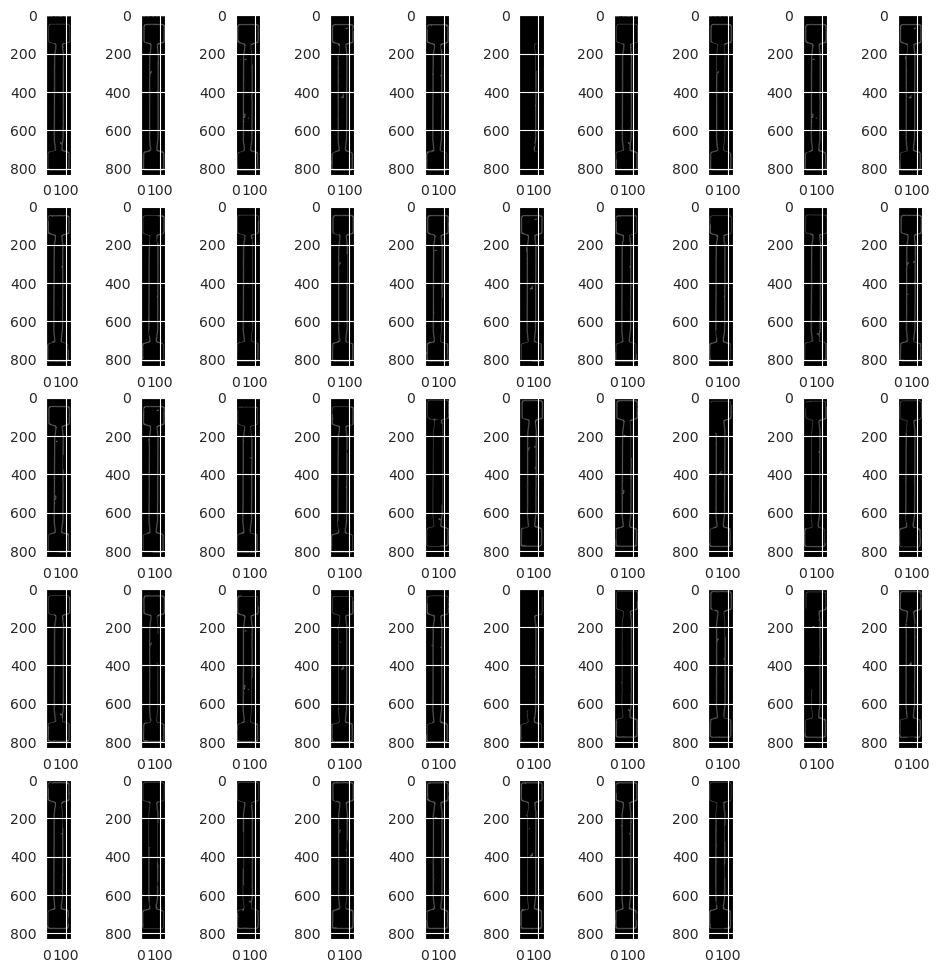

In [156]:
im_outer_arena_gray_contrast = []

for img in range(len(im_outer_arena_gray_resized)):
    im_outer_arena_gray_contrast.append(cv2.Canny(im_outer_arena_gray_resized[img],20,255))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb / 5 + 1)), i + 1),
    plt.imshow(im_outer_arena_gray_contrast[i], cmap='gray', vmin=0, vmax=255)

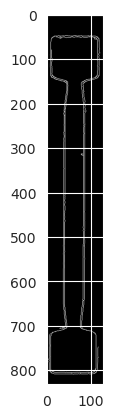

In [157]:
plt.imshow(im_outer_arena_gray_contrast[10], cmap='gray', vmin=0, vmax=255)

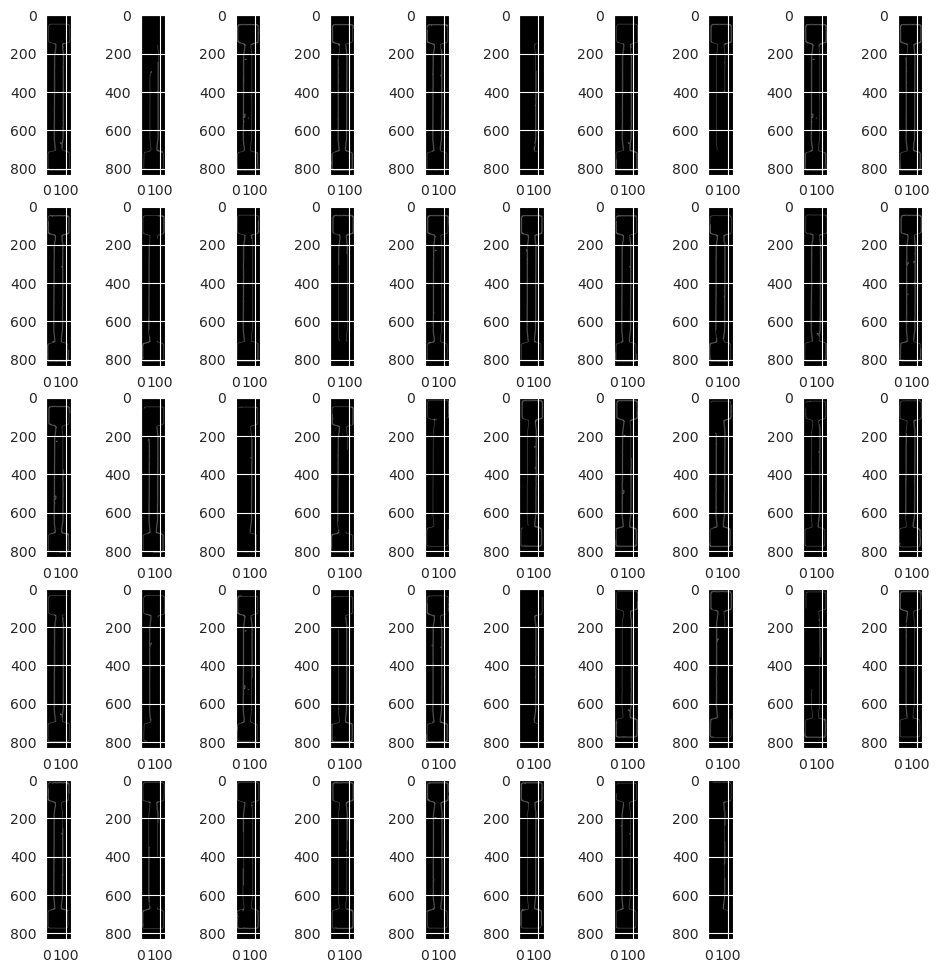

In [170]:
im_outer_arena_gray_clean = []

for i in range(im_outer_arena_nb):
    im_outer_arena_gray_clean.append(im_clean_contours(im_outer_arena_gray_contrast[i], "single_contour", bin_thresh=10, dil_kernel=np.ones((2,2), np.uint8)))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb/5+1)), i+1),
    plt.imshow(im_outer_arena_gray_clean[i], cmap='gray', vmin=0, vmax=255)

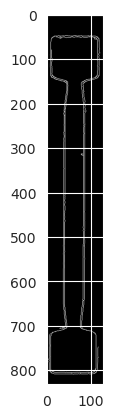

In [159]:
plt.imshow(im_outer_arena_gray_clean[10], cmap='gray', vmin=0, vmax=255)

In [160]:
#compute homography with respect to the first image
H_outer_arena = []
for i in range(1, im_outer_arena_nb):
    H_outer_arena.append(compute_homography_orb(im_outer_arena_gray_clean[i], im_outer_arena_gray_clean[0]))

In [171]:
im_gray = im_outer_arena_gray_contrast

In [162]:
im_size = np.shape(im_outer_arena_gray_clean[0])

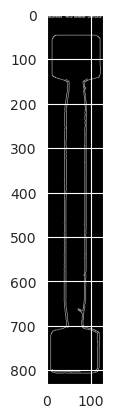

In [174]:
im_bg_gray_gen_avg = im_gray[0]
im_bg_gray_gen_avg
plt.imshow(im_bg_gray_gen_avg, cmap='gray', vmin=0, vmax=255)

In [164]:
im_nb = im_outer_arena_nb
H = H_outer_arena

In [139]:
im_bg_gray_gen_temp = cv2.warpAffine(im_gray[2], H[1], im_size)

In [172]:
for i in range(1, im_nb):
    idx = i - 1

    # im_bg_gray_gen_temp = cv2.warpPerspective(im_gray[i], H[idx], im_size)
    im_bg_gray_gen_temp = cv2.warpAffine(im_gray[i], H[idx], (127,832))
    # plt.figure()
    # plt.subplot(1,3,1)
    # plt.imshow(im_gray[i], cmap='gray', vmin=0, vmax=255)
    # plt.subplot(1,3,2)
    # plt.imshow(im_bg_gray_gen_temp, cmap='gray', vmin=0, vmax=255)

    # performs averaging
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha
    im_bg_gray_gen_avg = cv2.addWeighted(im_bg_gray_gen_temp, alpha, im_bg_gray_gen_avg, beta, 0.0)
    # plt.subplot(1,3,3)
    # plt.imshow(im_bg_gray_gen_avg, cmap='gray', vmin=0, vmax=255)

In [166]:

im_outer_arena_gray_clean_trans = compute_gen_im_template(im_outer_arena_gray_clean, H_outer_arena, im_outer_arena_nb)


error: OpenCV(4.6.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


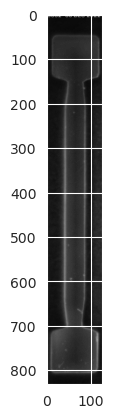

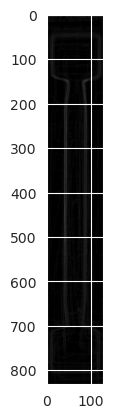

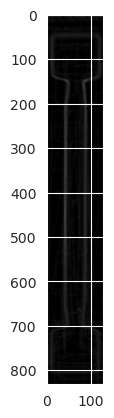

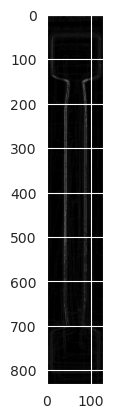

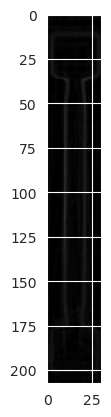

In [173]:
im_outer_arena_gray_clean_trans = im_bg_gray_gen_avg
im_outer_arena_gray_clean_trans_resized = cv2.resize(im_outer_arena_gray_clean_trans,
                                            (int(im_outer_arena_gray_clean_trans.shape[1]/rescaling_factor),
                                             int(im_outer_arena_gray_clean_trans.shape[0]/rescaling_factor)),
                                             interpolation = cv2.INTER_AREA)

im_outer_arena_gray_clean_trans_enhance = enhance_center(im_outer_arena_gray_clean_trans)
im_outer_arena_gray_clean_trans_unif = uniform_illumination(im_outer_arena_gray_clean_trans)


cv2.imwrite(ParentPath.joinpath("im_outer_arena.jpg").as_posix(), im_outer_arena_gray_clean_trans)
cv2.imwrite(ParentPath.joinpath("im_outer_arena_enhance.jpg").as_posix(), im_outer_arena_gray_clean_trans_enhance)
cv2.imwrite(ParentPath.joinpath("im_outer_arena_unif.jpg").as_posix(), im_outer_arena_gray_clean_trans_unif)
cv2.imwrite(ParentPath.joinpath("im_outer_arena_resized.jpg").as_posix(), im_outer_arena_gray_clean_trans_resized)



plt.figure()
plt.imshow(im_outer_arena_gray[0], cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans_enhance, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans_unif, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans_resized, cmap='gray', vmin=0, vmax=255)


In [193]:
Testopen = im_clean_opening(im_bg_gray_gen_avg, np.ones((1, 1), np.uint8), bin_thres= 20)

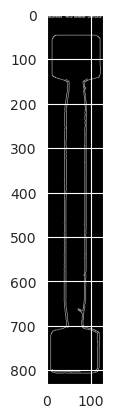

In [194]:
plt.imshow(Testopen, cmap='gray', vmin=0, vmax=255)

In [179]:
enhanceCont = cv2.equalizeHist(im_bg_gray_gen_avg)

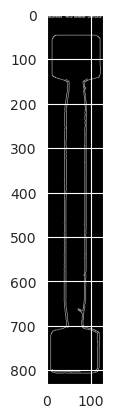

In [180]:
plt.imshow(enhanceCont, cmap='gray', vmin=0, vmax=255)


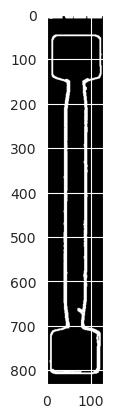

In [199]:
thicker = cv2.dilate(im_bg_gray_gen_avg, np.ones((4, 4), np.uint8))
plt.imshow(thicker, cmap='gray', vmin=0, vmax=255)


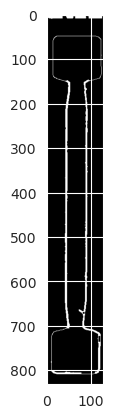

In [204]:
fine = cv2.erode(thicker, np.ones((2, 2), np.uint8), iterations = 3)
plt.imshow(fine, cmap='gray', vmin=0, vmax=255)

In [205]:
cv2.imwrite(ParentPath.joinpath("MultiMaze_Spacer_Template.jpg").as_posix(), fine)

True